In [1]:
! pip install numpy pandas seaborn matplotlib scikit-learn imbalanced-learn xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   --- ------------------------------------ 10.2/124.9 MB 48.8 MB/s eta 0:00:03
   ------ --------------------------------- 21.0/124.9 MB 49.1 MB/s eta 0:00:03
   ---------- ----------------------------- 31.7/124.9 MB 49.1 MB/s eta 0:00:02
   ------------- -------------------------- 42.5/124.9 MB 49.1 MB/s eta 0:00:02
   ---------------- ----------------------- 52.7/124.9 MB 49.3 MB/s eta 0:00:02
   ------------------ --------------------- 56.6/124.9 MB 44.5 MB/s eta 0:00:02
   ------------------- -------------------- 60.6/124.9 MB 40.6 MB/s eta 0:00:02
   --------------------- ------------------ 68.2/124.9 MB 39.8 MB/s eta 0:00:02
   ----------------------- ---------------- 73.9/124.9 MB 38.3 MB/s eta 0:00:02
   ------------------------- -------------- 79.4/124.9 MB 37.3 MB/s eta 0:00:02
   --------------------------- ------------ 84.9/124.9 MB 35.9 MB/s eta 0:00:02
   ---------------------------- ----------- 90.4/

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


In [3]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

In [4]:
train_n = train.copy()
test_n = test.copy()

In [5]:
print(train_n.columns)
print(test_n.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [6]:
print(train_n.dtypes)
print(train_n.shape, ",",test.shape)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
(614, 13) , (367, 12)


In [7]:
print("Dataset Dimensions:", train_n.shape)
print("\nData Types:\n", train_n.dtypes)
print("\nMissing Values:\n", train_n.isnull().sum())
print("\nSummary Statistics (Numerical):\n", train_n.describe())
print("\nSummary Statistics (Categorical):\n", train_n.describe(include=['object']))

Dataset Dimensions: (614, 13)

Data Types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Missing Values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Summary Statistics (Numerical):
        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245

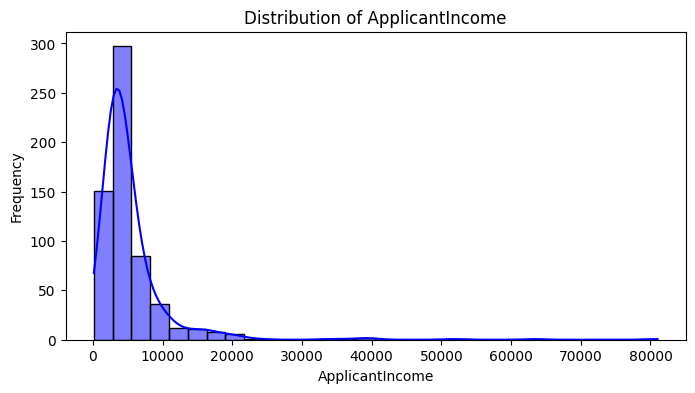

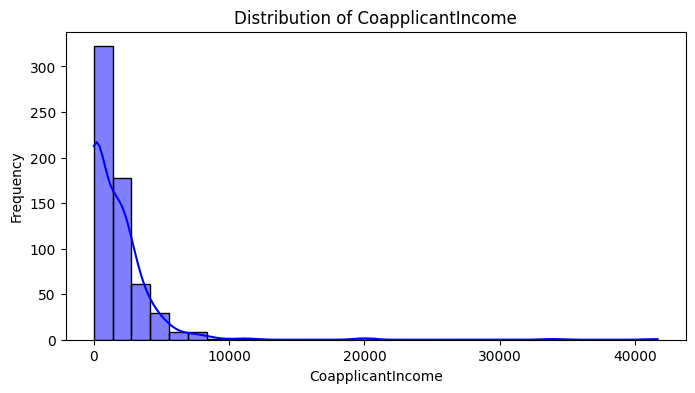

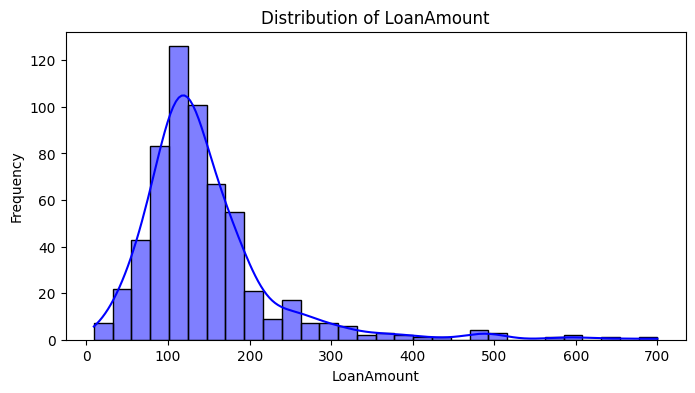

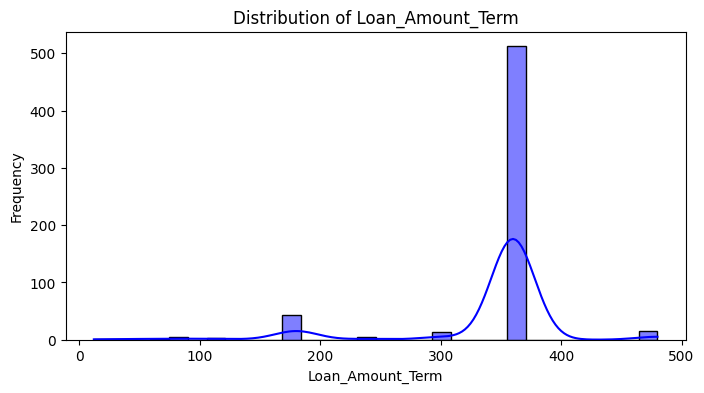

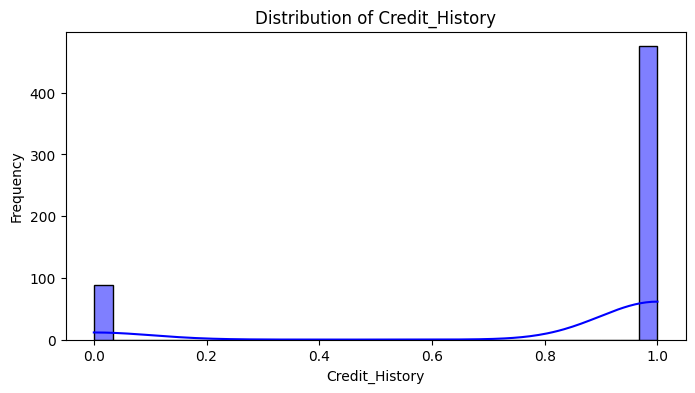

In [8]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_n[feature].dropna(), kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1209665719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_n, palette='Set2')


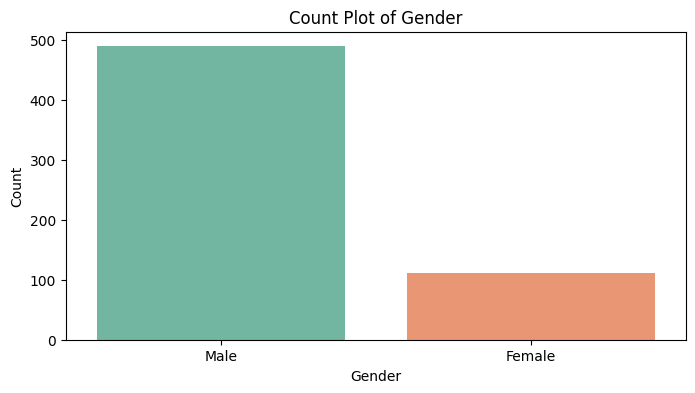

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1209665719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_n, palette='Set2')


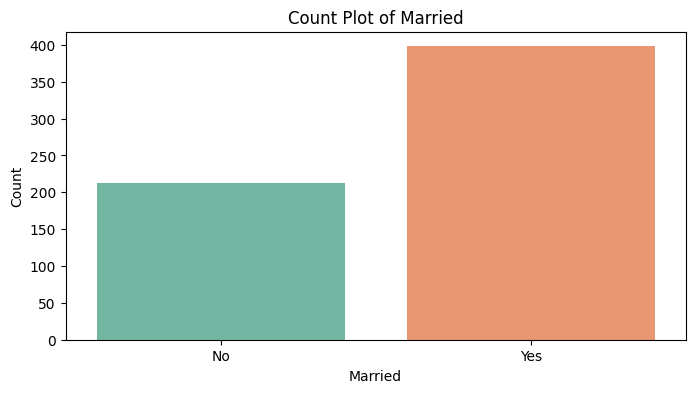

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1209665719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_n, palette='Set2')


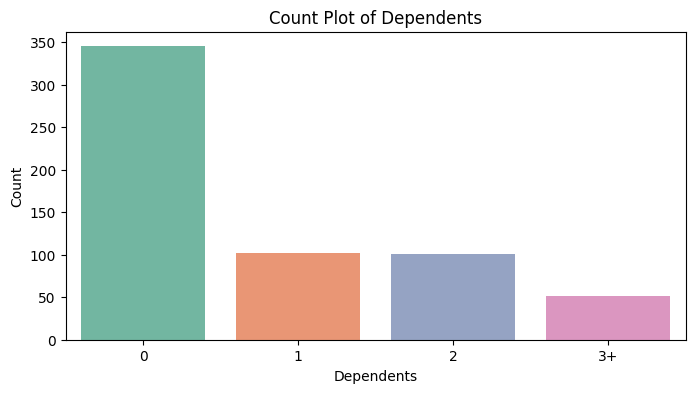

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1209665719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_n, palette='Set2')


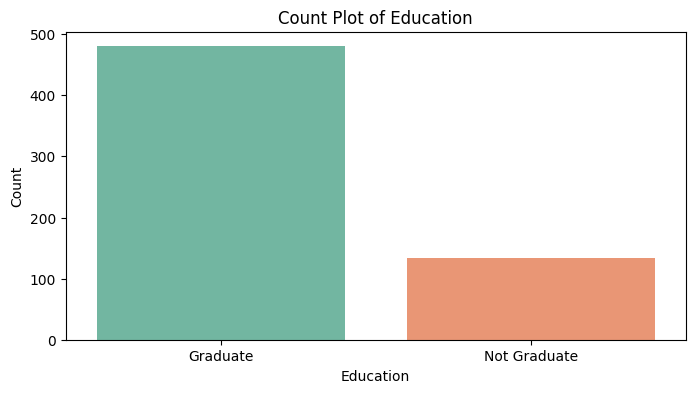

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1209665719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_n, palette='Set2')


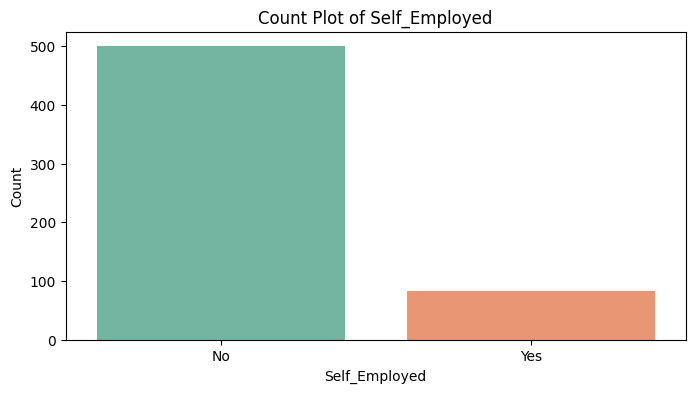

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1209665719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_n, palette='Set2')


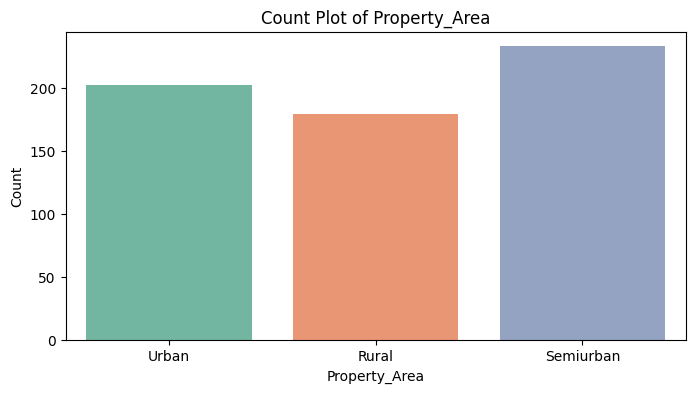

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1209665719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_n, palette='Set2')


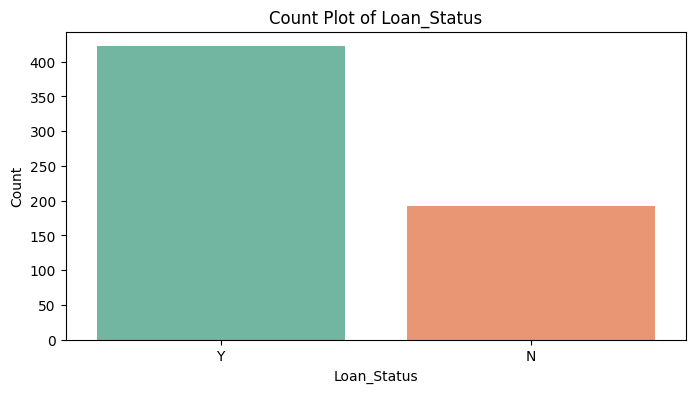

In [9]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=train_n, palette='Set2')
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1689075368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=feature, data=train_n, palette='Set3')


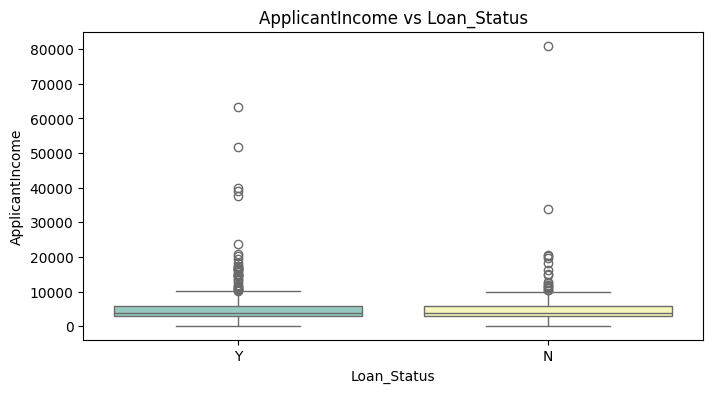

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1689075368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=feature, data=train_n, palette='Set3')


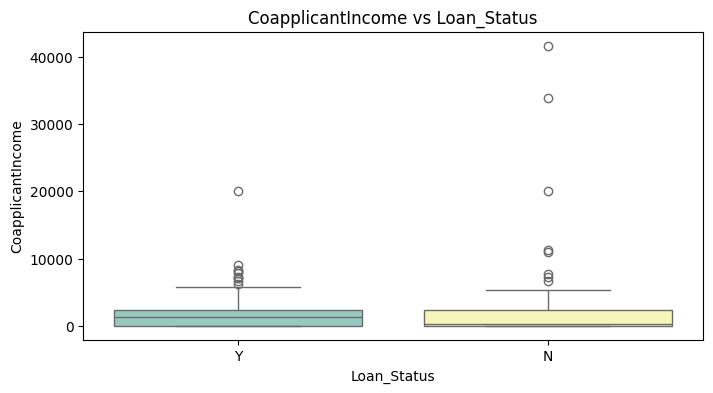

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1689075368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=feature, data=train_n, palette='Set3')


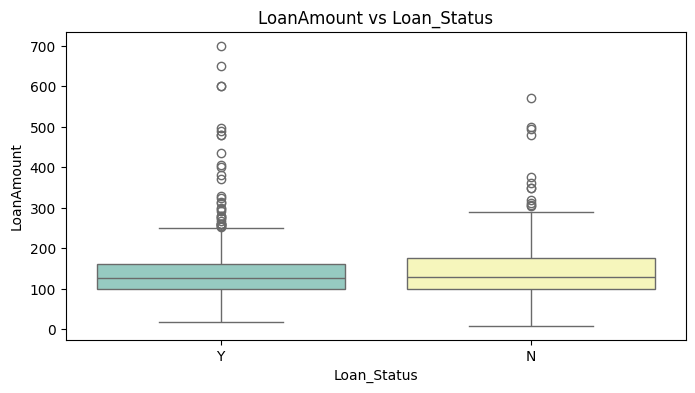

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1689075368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=feature, data=train_n, palette='Set3')


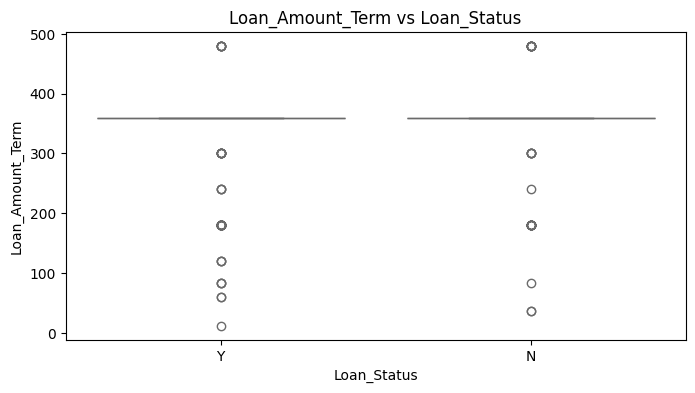

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1689075368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=feature, data=train_n, palette='Set3')


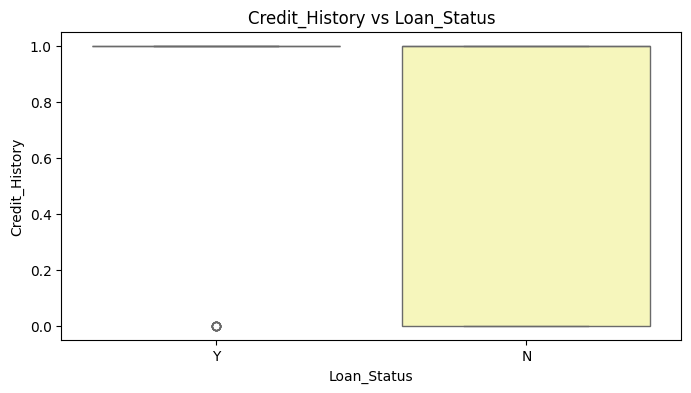

In [10]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Loan_Status', y=feature, data=train_n, palette='Set3')
    plt.title(f'{feature} vs Loan_Status')
    plt.show()

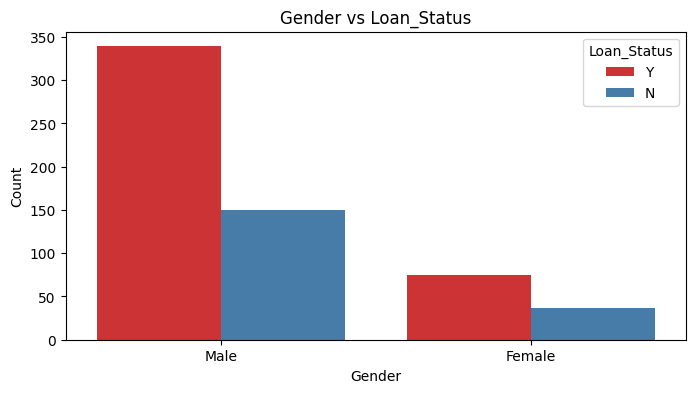

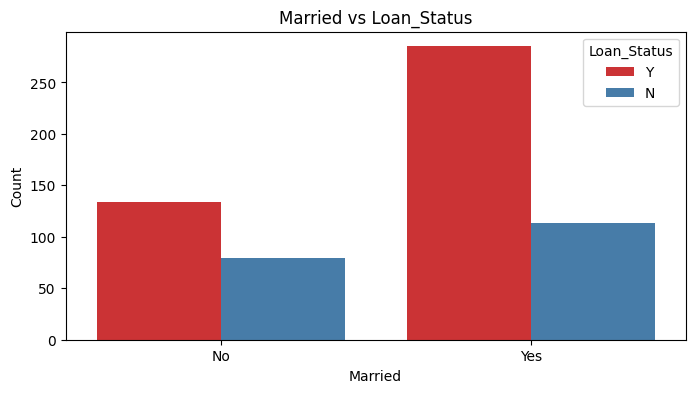

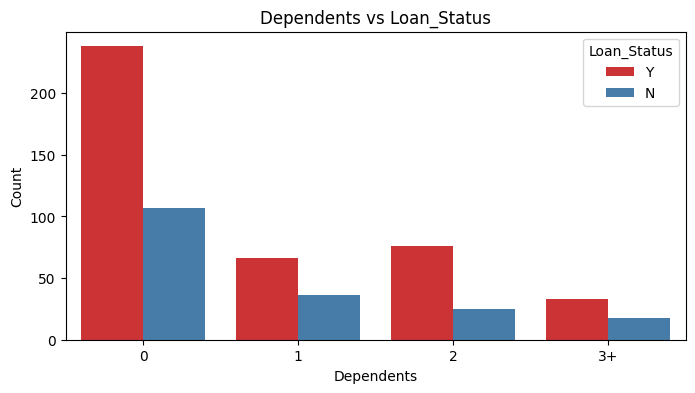

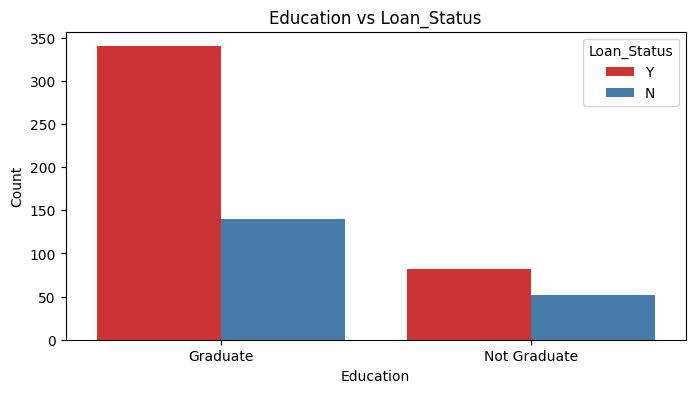

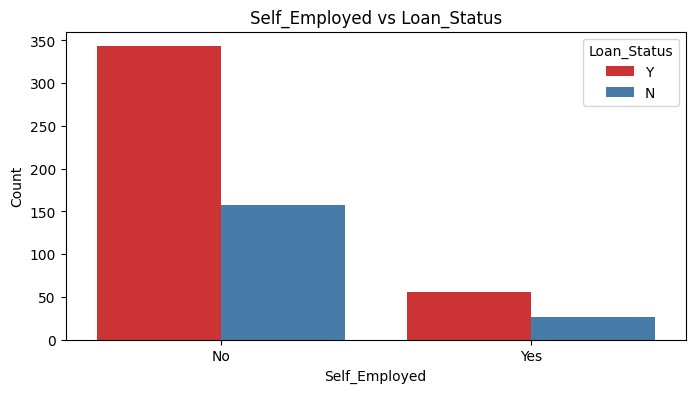

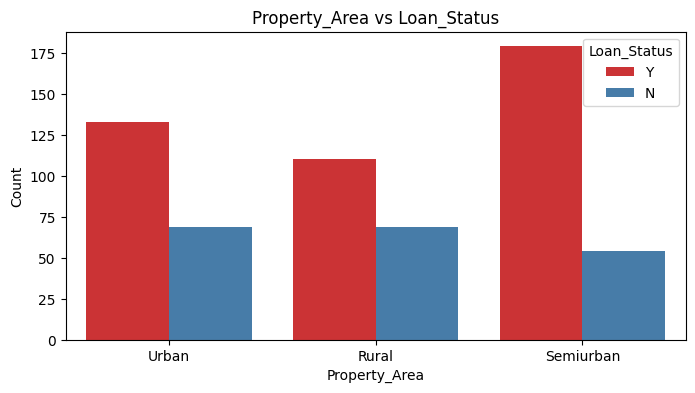

In [11]:
for feature in categorical_features[:-1]:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='Loan_Status', data=train_n, palette='Set1')
    plt.title(f'{feature} vs Loan_Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

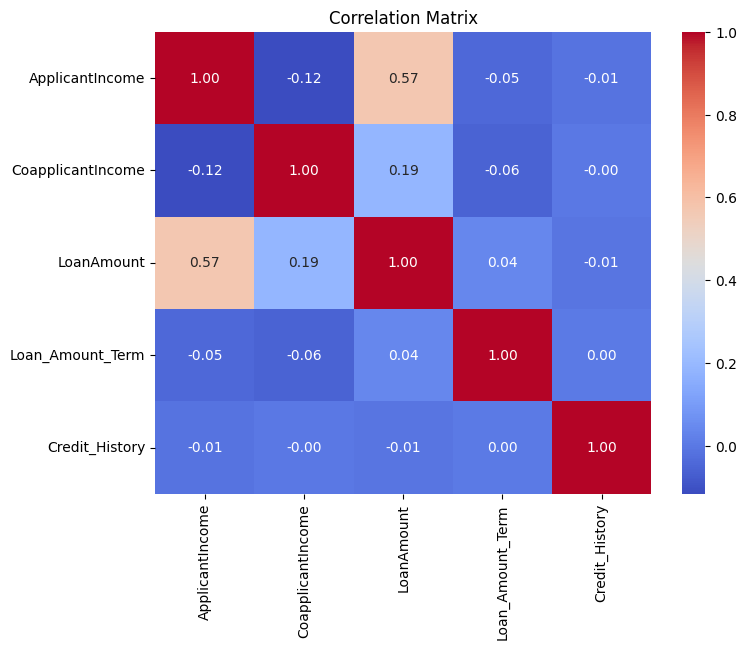

In [12]:
correlation_matrix = train_n[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
missing_values = train_n.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1468290826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_n[feature], palette='Set2')


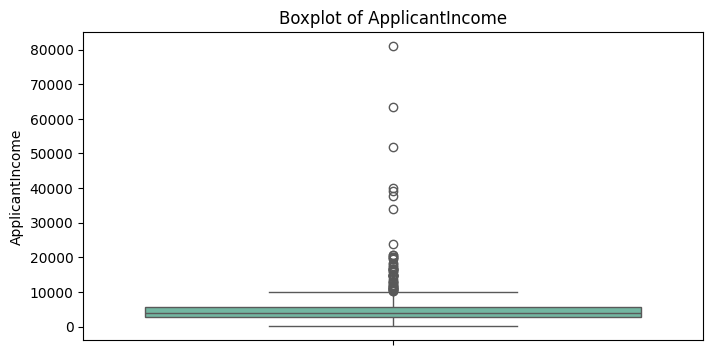

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1468290826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_n[feature], palette='Set2')


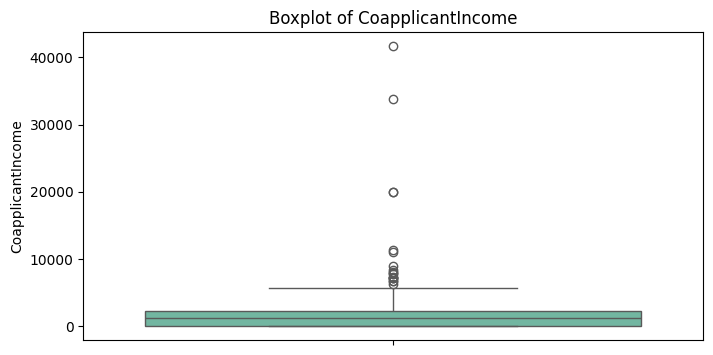

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1468290826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_n[feature], palette='Set2')


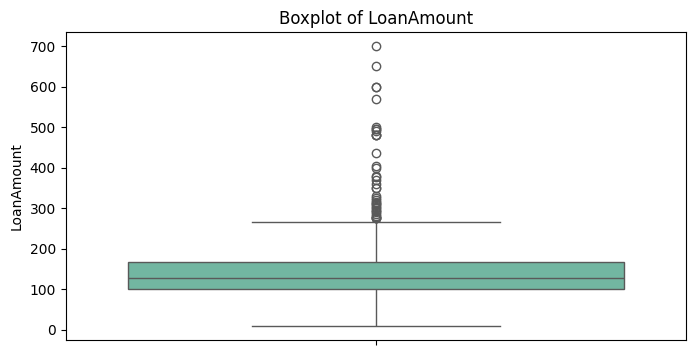

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1468290826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_n[feature], palette='Set2')


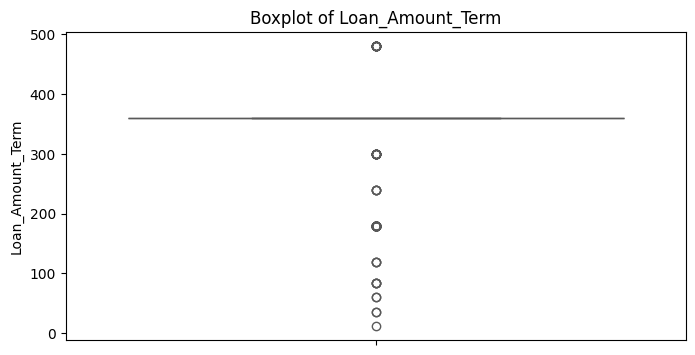

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1468290826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_n[feature], palette='Set2')


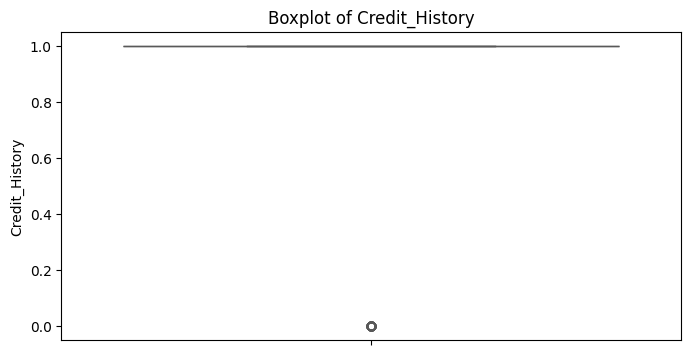

In [14]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(train_n[feature], palette='Set2')
    plt.title(f'Boxplot of {feature}')
    plt.show()

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\1487506375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=train_n, palette='Set3')


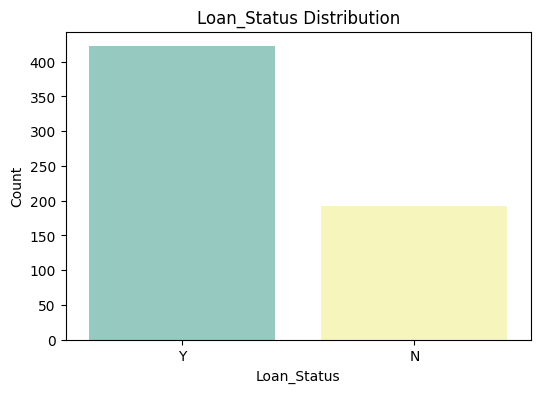

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=train_n, palette='Set3')
plt.title('Loan_Status Distribution')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

In [16]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_features:
    train_n[col].fillna(train_n[col].median(), inplace=True)

numerical_features_test = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_features_test:
    test_n[col].fillna(test_n[col].median(), inplace=True)

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\2422504790.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_n[col].fillna(train_n[col].median(), inplace=True)
C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\2422504790.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [17]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_features:
    train_n[col].fillna(train_n[col].mode()[0], inplace=True)

print("\nMissing values after imputation:\n", train_n.isnull().sum())


categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_features:
    test_n[col].fillna(test_n[col].mode()[0], inplace=True)

print("\nMissing values after imputation:\n", test_n.isnull().sum())


Missing values after imputation:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Missing values after imputation:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\3165587567.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_n[col].fillna(train_n[col].mode()[0], inplace=True)
C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\3165587567.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [18]:
def remove_outliers(train_n, column):
    Q1 = train_n[column].quantile(0.25)
    Q3 = train_n[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return train_n[(train_n[column] >= lower_bound) & (train_n[column] <= upper_bound)]

In [19]:
for col in numerical_features:
    train_n = remove_outliers(train_n, col)

print("\nDataset shape after outlier removal:", train_n.shape)


Dataset shape after outlier removal: (383, 13)


In [20]:
scaler = MinMaxScaler()
train_n[numerical_features] = scaler.fit_transform(train_n[numerical_features])

print("\nNormalized Data Sample:")
print(train_n[numerical_features].head())


Normalized Data Sample:
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.578579           0.000000    0.485714               0.0   
1         0.450051           0.268089    0.485714               0.0   
2         0.289340           0.000000    0.190476               0.0   
3         0.247005           0.419200    0.447619               0.0   
4         0.593909           0.000000    0.547619               0.0   

   Credit_History  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  


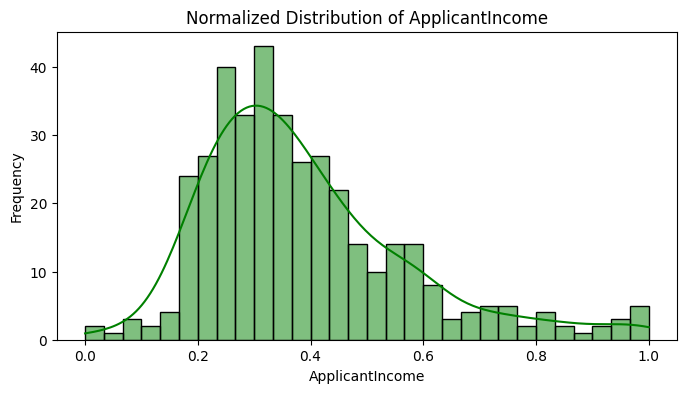

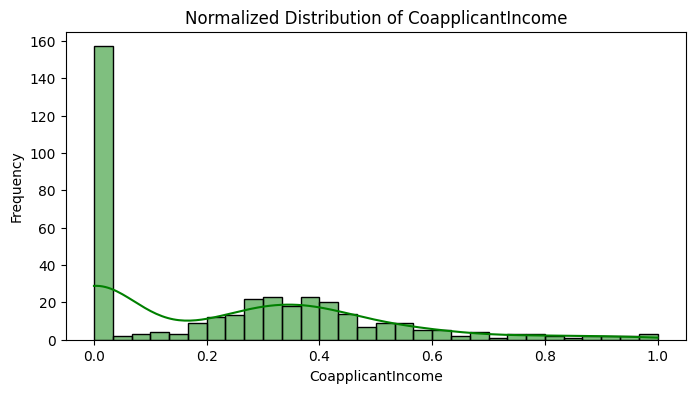

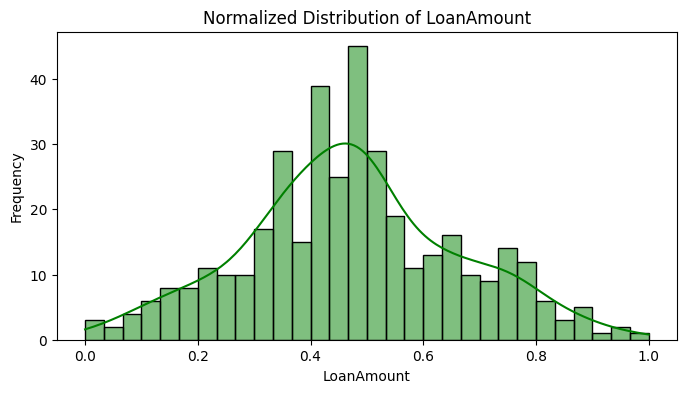

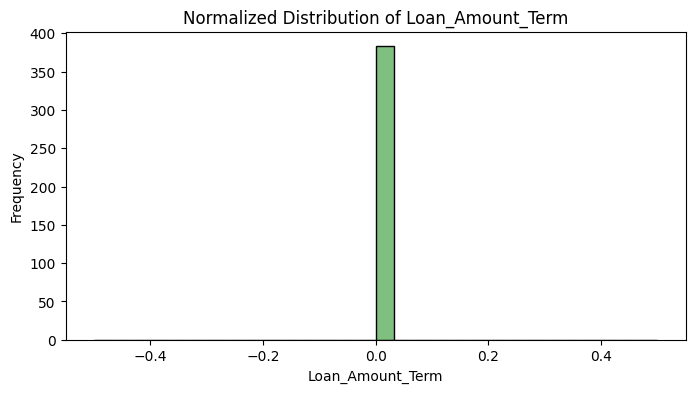

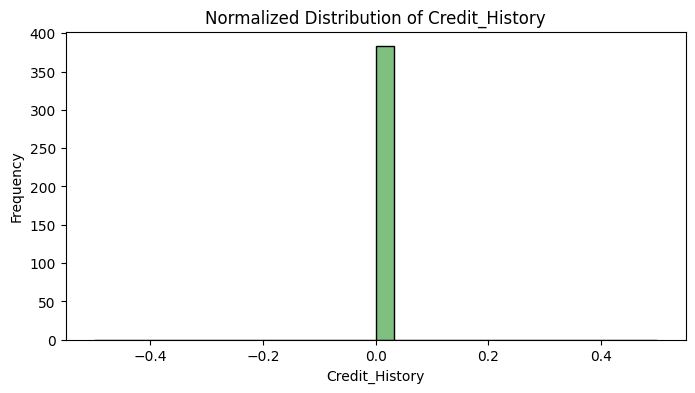

In [21]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_n[feature], kde=True, bins=30, color='green')
    plt.title(f'Normalized Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\3246627404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_n, palette='Set2')


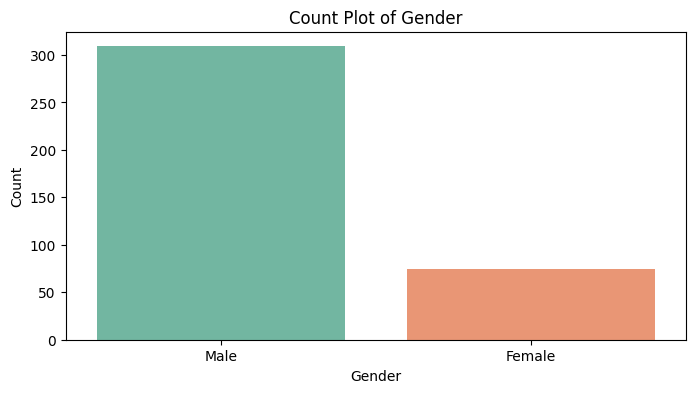

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\3246627404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_n, palette='Set2')


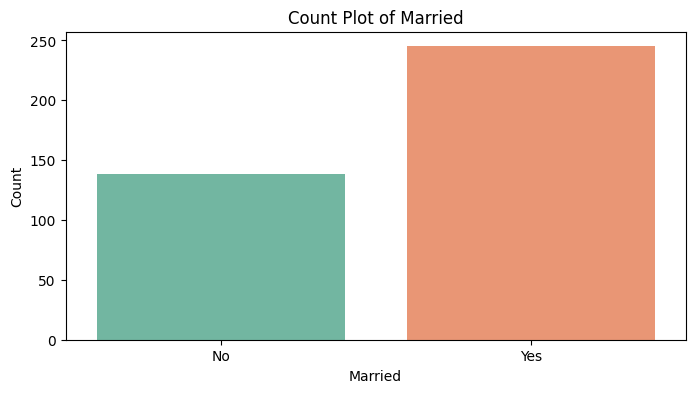

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\3246627404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_n, palette='Set2')


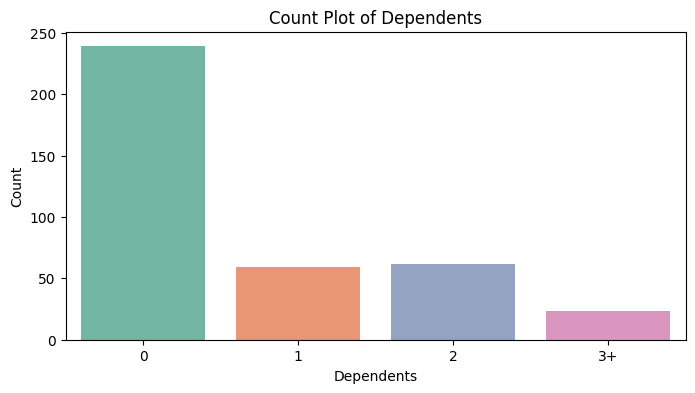

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\3246627404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_n, palette='Set2')


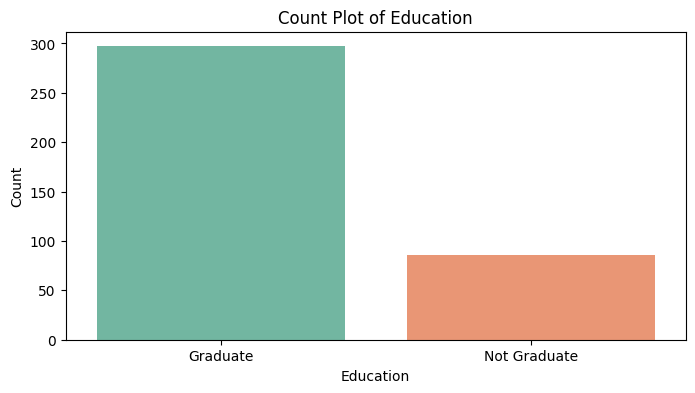

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\3246627404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_n, palette='Set2')


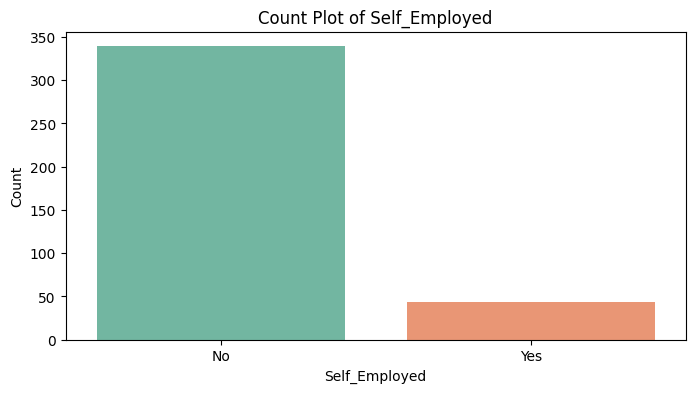

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\3246627404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_n, palette='Set2')


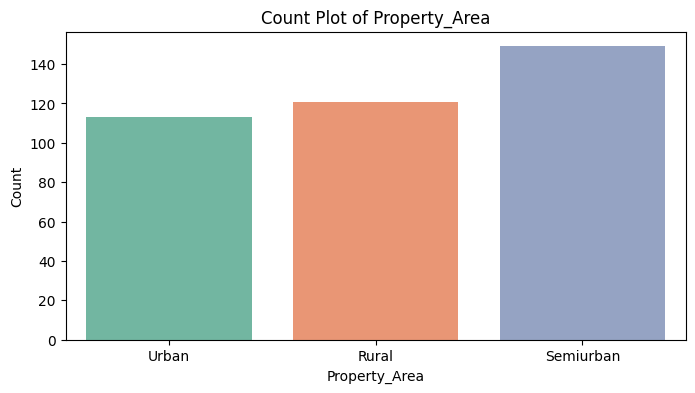

In [22]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=train_n, palette='Set2')
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

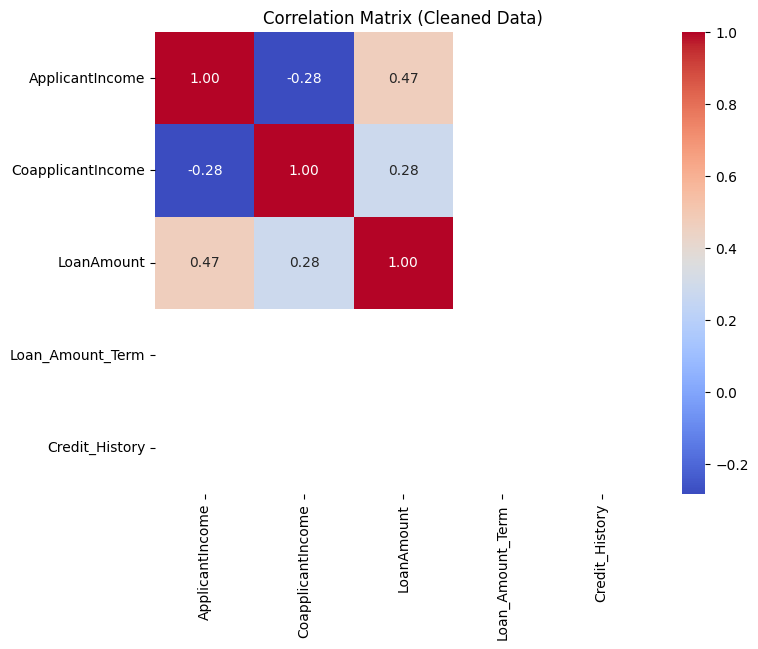

In [23]:
correlation_matrix = train_n[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Cleaned Data)')
plt.show()

C:\Users\drxmu\AppData\Local\Temp\ipykernel_11680\3235690116.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=train_n, palette='Set3')


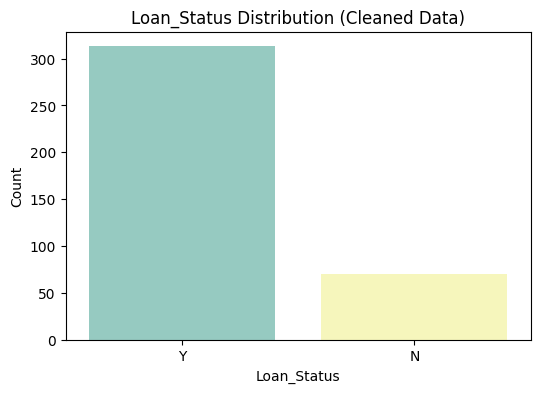

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=train_n, palette='Set3')
plt.title('Loan_Status Distribution (Cleaned Data)')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

In [25]:
label_encoder = LabelEncoder()
for col in categorical_features:
    train_n[col] = label_encoder.fit_transform(train_n[col])

In [26]:
train_n.drop('Loan_ID', axis=1, inplace=True)

In [27]:
X = train_n.drop('Loan_Status', axis=1) 
y = train_n['Loan_Status']     

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = logistic_model.predict(X_test)

In [31]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8051948051948052

Confusion Matrix:
 [[ 0 15]
 [ 0 62]]

Classification Report:
               precision    recall  f1-score   support

           N       0.00      0.00      0.00        15
           Y       0.81      1.00      0.89        62

    accuracy                           0.81        77
   macro avg       0.40      0.50      0.45        77
weighted avg       0.65      0.81      0.72        77



c:\Users\drxmu\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drxmu\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drxmu\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
logistic_model = LogisticRegression(class_weight='balanced', random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.5324675324675324

Confusion Matrix:
 [[ 9  6]
 [30 32]]

Classification Report:
               precision    recall  f1-score   support

           N       0.23      0.60      0.33        15
           Y       0.84      0.52      0.64        62

    accuracy                           0.53        77
   macro avg       0.54      0.56      0.49        77
weighted avg       0.72      0.53      0.58        77



In [33]:
y_pred = logistic_model.predict(X_test)

In [34]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
411,1,1,0,0,0,0.619898,0.000000,0.638095,0.0,0.0,2
382,0,0,0,0,0,0.593909,0.000000,0.619048,0.0,0.0,2
492,1,0,0,1,0,0.359492,0.000000,0.400000,0.0,0.0,0
520,1,1,2,1,0,0.207310,0.309689,0.090476,0.0,0.0,1
86,1,1,2,1,0,0.323147,0.355556,0.347619,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
158,1,0,0,0,0,0.287310,0.370311,0.447619,0.0,0.0,0
259,1,1,3,1,0,0.485381,0.000000,0.485714,0.0,0.0,1
95,1,0,0,0,0,0.673299,0.000000,0.485714,0.0,0.0,2
352,1,1,3,0,0,0.255431,0.370311,0.328571,0.0,0.0,0


In [35]:
test_n

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [36]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

In [37]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [38]:
y_pred_rf = rf_model.predict(X_test)

In [39]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8051948051948052

Confusion Matrix:
 [[ 0 15]
 [ 0 62]]

Classification Report:
               precision    recall  f1-score   support

           N       0.00      0.00      0.00        15
           Y       0.81      1.00      0.89        62

    accuracy                           0.81        77
   macro avg       0.40      0.50      0.45        77
weighted avg       0.65      0.81      0.72        77



c:\Users\drxmu\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drxmu\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drxmu\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.80519481 0.81818182 0.79220779 0.81578947 0.76315789]
Mean CV Accuracy: 0.7989063568010937


In [41]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [42]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           verbose=2, 
                           n_jobs=-1)

In [43]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [44]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [45]:
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

In [46]:
print("\nBest Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))


Best Random Forest Accuracy: 0.8051948051948052

Confusion Matrix:
 [[ 0 15]
 [ 0 62]]

Classification Report:
               precision    recall  f1-score   support

           N       0.00      0.00      0.00        15
           Y       0.81      1.00      0.89        62

    accuracy                           0.81        77
   macro avg       0.40      0.50      0.45        77
weighted avg       0.65      0.81      0.72        77



c:\Users\drxmu\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drxmu\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drxmu\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
train_n1 = train.copy()

In [48]:
label_encoder = LabelEncoder()
for col in categorical_features:
    train_n[col] = label_encoder.fit_transform(train_n[col])

In [49]:
# train_n = train_n1.drop('Loan_ID', axis=1)
X = train_n.drop('Loan_Status', axis=1)
y = train_n['Loan_Status']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_balanced, y_train_balanced)

In [52]:
xgb_model = XGBClassifier(random_state=42, eval_metric="logloss", use_label_encoder=False)


xgb_model.fit(X_train_balanced, y_train_balanced)

In [53]:
def create_model(n_estimators=100, max_depth=3, learning_rate=0.1, subsample=1.0):
    return XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        random_state=42,
        eval_metric="logloss",
        use_label_encoder=False
    )

In [54]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
}

In [55]:
grid_search = GridSearchCV(estimator=create_model(), param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [1]:
import xgboost
import sklearn

print("XGBoost version:", xgboost.__version__)
print("Scikit-learn version:", sklearn.__version__)


XGBoost version: 2.1.3
Scikit-learn version: 1.6.1


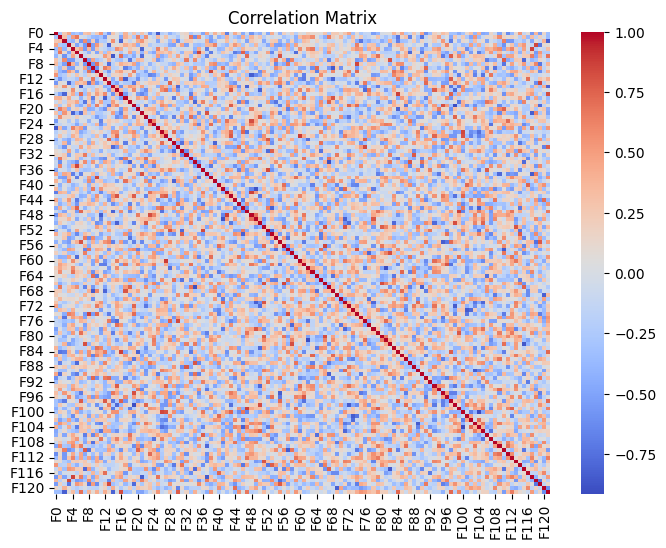